GOAL: Look through a dataset of electric vehicles from Kaggle from user Urvish Ahir (Link: https://www.kaggle.com/datasets/urvishahir/electric-vehicle-specifications-dataset-2025/data). 
The goal of this dataset is see if there are interesting trends that can be used in a model (preferably regression), and remove missing points of data so a clean dataset or datasets can be exported. 

In [1]:
import scipy
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

E_Vehicles_Specs = pd.read_csv(r'C:\Users\harme\Documents\electric_vehicles_spec_2025.csv')

In [2]:
pd.set_option('display.max_columns', None) #To see all columns
E_Vehicles_Specs

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,240.0,CCS,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,70.0,CCS,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,114.0,CCS,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,114.0,CCS,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [3]:
print(E_Vehicles_Specs.dtypes)

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
battery_type                  object
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object


Seems to be no problems with the typing of each columns except for cargo volume which is labeled as an object instead of int64 or float64. 

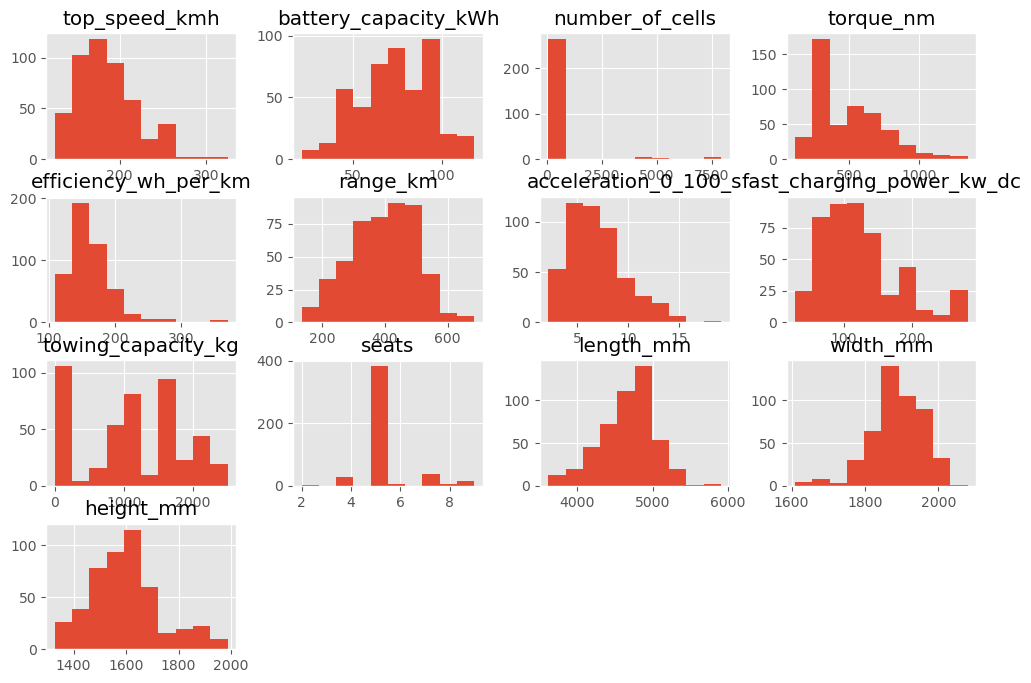

       top_speed_kmh  battery_capacity_kWh  number_of_cells    torque_nm  \
count     478.000000            478.000000       276.000000   471.000000   
mean      185.487448             74.043724       485.293478   498.012739   
std        34.252773             20.331058      1210.819733   241.461128   
min       125.000000             21.300000        72.000000   113.000000   
25%       160.000000             60.000000       150.000000   305.000000   
50%       180.000000             76.150000       216.000000   430.000000   
75%       201.000000             90.600000       324.000000   679.000000   
max       325.000000            118.000000      7920.000000  1350.000000   

       efficiency_wh_per_km    range_km  acceleration_0_100_s  \
count            478.000000  478.000000            478.000000   
mean             162.903766  393.179916              6.882636   
std               34.317532  103.287335              2.730696   
min              109.000000  135.000000              2.

In [4]:
E_Vehicles_Specs.hist()
plt.show()
print(E_Vehicles_Specs.describe())

Looking at both the histograms and information about numeric columns, it seems most columns have no major issues except for number of cells. as it seems there are 2 pockets that have thousands of cells in the car. This column may either need to have points taken out that behave like outliers, or taken out entirely, this depends on the amount of missing points in the column.

In [5]:
for col in E_Vehicles_Specs.columns:
    missing = E_Vehicles_Specs[col].isnull().sum()
    print('{} - {}'.format(col,missing))

brand - 0
model - 1
top_speed_kmh - 0
battery_capacity_kWh - 0
battery_type - 0
number_of_cells - 202
torque_nm - 7
efficiency_wh_per_km - 0
range_km - 0
acceleration_0_100_s - 0
fast_charging_power_kw_dc - 1
fast_charge_port - 1
towing_capacity_kg - 26
cargo_volume_l - 1
seats - 0
drivetrain - 0
segment - 0
length_mm - 0
width_mm - 0
height_mm - 0
car_body_type - 0
source_url - 0


Looking at the total amount of missing values most columns have either no missing values or 1 missing value, except for number of cells, torque, and towing capacity. For the ones missing one it may be an error in the dataset, but the columns missing multiple values it may be a trend with a certain company or an industry standard to not share that kind of information. 

With the previous information it maybe better to remove the table due to strong outliers and a significant chuck of data missing.

In [6]:
E_Vehicles_Specs = E_Vehicles_Specs.drop('number_of_cells', axis = 1)

In [7]:
#Missing_Cells = E_Vehicles_Specs[E_Vehicles_Specs['number_of_cells'].isnull()]
#Missing_Cells #Can be exported for use in testing a prediction model

In [8]:
#Missing_Cells.to_csv('ElectricVehicle_MissingCells.csv', index = False)

In [9]:
E_Vehicles_Specs[E_Vehicles_Specs['torque_nm'].isnull()]

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
61,BYD,DOLPHIN 44.9 kWh Boost,160,44.9,Lithium-ion,NaN,145,260,8.0,50.0,CCS,0.0,345,5,FWD,C - Medium,4290,1770,1570,Hatchback,https://ev-database.org/car/1918/BYD-DOLPHIN-4...
195,Lucid,Air Pure RWD,200,92.0,Lithium-ion,NaN,130,565,4.7,160.0,CCS,0.0,456,5,RWD,F - Luxury,4975,1939,1410,Sedan,https://ev-database.org/car/2116/Lucid-Air-Pur...
196,Lucid,Air Touring,250,92.0,Lithium-ion,NaN,142,580,3.2,160.0,CCS,0.0,456,5,AWD,F - Luxury,4975,1939,1410,Sedan,https://ev-database.org/car/1317/Lucid-Air-Tou...
401,Tesla,Model S Dual Motor,250,95.0,Lithium-ion,NaN,150,575,3.2,140.0,CCS,1600.0,709,5,AWD,F - Luxury,5021,1987,1431,Liftback Sedan,https://ev-database.org/car/1404/Tesla-Model-S...
402,Tesla,Model S Plaid,282,95.0,Lithium-ion,NaN,158,560,2.3,140.0,CCS,1600.0,709,5,AWD,F - Luxury,5021,1987,1431,Liftback Sedan,https://ev-database.org/car/1405/Tesla-Model-S...
403,Tesla,Model X Dual Motor,250,95.0,Lithium-ion,NaN,165,485,3.9,140.0,CCS,2250.0,425,7,AWD,JF - Luxury,5057,1999,1680,SUV,https://ev-database.org/car/1407/Tesla-Model-X...
404,Tesla,Model X Plaid,262,95.0,Lithium-ion,NaN,180,465,2.7,140.0,CCS,2250.0,425,7,AWD,JF - Luxury,5057,1999,1680,SUV,https://ev-database.org/car/1408/Tesla-Model-X...


The missing value here seems to be a combination of errors when making the table and information relating to torque potentially not being easily shown for specific cars. 

In [10]:
E_Vehicles_Specs[E_Vehicles_Specs['towing_capacity_kg'].isnull()]

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
4,Aiways,U5,150,60.0,Lithium-ion,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
5,Aiways,U6,160,60.0,Lithium-ion,315.0,150,350,7.0,78.0,CCS,NaN,472,5,FWD,JC - Medium,4805,1880,1641,SUV,https://ev-database.org/car/1766/Aiways-U6
100,Dongfeng,Box 31.4 kWh,140,29.0,Lithium-ion,160.0,126,190,12.5,50.0,CCS,NaN,326,5,FWD,B - Compact,4020,1810,1570,Hatchback,https://ev-database.org/car/3035/Dongfeng-Box-...
101,Dongfeng,Box 42.3 kWh,140,40.0,Lithium-ion,160.0,129,255,12.5,51.0,CCS,NaN,326,5,FWD,B - Compact,4020,1810,1570,Hatchback,https://ev-database.org/car/3036/Dongfeng-Box-...
102,Elaris,BEO 86 kWh,150,81.0,Lithium-ion,320.0,203,390,9.5,65.0,CCS,NaN,467,5,FWD,JD - Large,4698,1908,1696,SUV,https://ev-database.org/car/1975/Elaris-BEO-86...
139,Genesis,G80 Electrified Luxury,225,82.5,Lithium-ion,700.0,159,440,4.9,160.0,CCS,NaN,354,5,AWD,F - Luxury,5005,1925,1470,Sedan,https://ev-database.org/car/1703/Genesis-G80-E...
148,Hyundai,INSTER Long Range,150,46.0,Lithium-ion,147.0,124,300,10.6,70.0,CCS,NaN,280,4,FWD,JA - Mini,3825,1610,1575,SUV,https://ev-database.org/car/2231/Hyundai-INSTE...
149,Hyundai,INSTER Standard Range,140,39.0,Lithium-ion,147.0,119,255,11.7,60.0,CCS,NaN,280,4,FWD,JA - Mini,3825,1610,1575,SUV,https://ev-database.org/car/2230/Hyundai-INSTE...
168,Kia,EV4 Hatchback Long Range,170,78.0,Lithium-ion,283.0,132,475,7.7,105.0,CCS,NaN,435,5,FWD,C - Medium,4430,1860,1485,Hatchback,https://ev-database.org/car/3124/Kia-EV4-Hatch...
169,Kia,EV4 Hatchback Standard Range,170,55.0,Lithium-ion,283.0,134,340,7.4,80.0,CCS,NaN,435,5,FWD,C - Medium,4430,1860,1485,Hatchback,https://ev-database.org/car/3123/Kia-EV4-Hatch...


Searching up the each of the brands for the missing towing capacity they all seem to be foriegn car makers (Outside the United States), so it may be that these cars are either not made for towing (example you wouldn't be towing using a luxery vehicle), or the car maker did not deem it important to state towing capacity.

First we need to drop all rows with missing values so we can make use of all data points without missing values and with number of cells not being included we will be able to keep a significant amount data

In [11]:
E_Vehicles_Specs = E_Vehicles_Specs.dropna()
E_Vehicles_Specs

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,260.0,128,320,9.0,85.0,CCS,0.0,400,5,FWD,JB - Compact,4173,1781,1532,SUV,https://ev-database.org/car/2184/Alfa-Romeo-Ju...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Zeekr,7X Performance AWD,210,94.0,Lithium-ion,710.0,173,450,3.8,260.0,CCS,2000.0,539,5,AWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3083/Zeekr-7X-Perf...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,440.0,148,365,6.0,240.0,CCS,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,343.0,148,265,5.9,70.0,CCS,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,343.0,146,360,5.6,114.0,CCS,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...


In [12]:
E_Vehicles_Specs.dtypes #To see column types

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
battery_type                  object
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                object
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object

In [13]:
#E_Vehicles_Specs['cargo_volume_l'] = E_Vehicles_Specs['cargo_volume_l'].astype('int64')

#Error occured "ValueError: invalid literal for int() with base 10: '10 Banana Boxes'"

In [14]:
#pd.set_option('display.max_rows', None) # Expanded rows displayed in order to look through all rows to look for rows that may have problems converting
#E_Vehicles_Specs

Further research in the table saws the cargo volume of 10 Banana Boxes is from the Audi Q6. Using Google to further look into this unusual detail not seen in any other car seems to be from a YouTube video by Bjørn Nyland called "Audi Q6 e-tron banana box test" (link: https://www.youtube.com/watch?v=8TqgJNZZ9EY). Looking for the true value it seems to be 526 so this value will be replaced.
It also seems there is a 31 Banana Boxes and 13 Banana Boxes for similar reasons see below.

Also while looking through the table it appears that all the cars have the same battery_type, so it has no point of being included

In [15]:
E_Vehicles_Specs = E_Vehicles_Specs.drop('battery_type', axis = 1)

In [16]:
E_Vehicles_Specs[E_Vehicles_Specs['cargo_volume_l'] == '10 Banana Boxes']

,brand,model,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
29,Audi,Q6 e-tron quattro,210,94.9,855.0,176,480,5.9,200.0,CCS,2400.0,10 Banana Boxes,5,AWD,JD - Large,4771,1939,1685,SUV,https://ev-database.org/car/2146/Audi-Q6-e-tro...


In [17]:
E_Vehicles_Specs[E_Vehicles_Specs['cargo_volume_l'] == '31 Banana Boxes']

,brand,model,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
213,Maxus,MIFA 9,180,84.0,350.0,195,365,9.2,103.0,CCS,1000.0,31 Banana Boxes,7,FWD,N - Passenger Van,5270,2000,1840,Small Passenger Van,https://ev-database.org/car/1837/Maxus-MIFA-9


In [18]:
E_Vehicles_Specs[E_Vehicles_Specs['cargo_volume_l'] == '13 Banana Boxes']

,brand,model,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
246,Mercedes-Benz,EQS SUV 580 4MATIC,210,118.0,858.0,199,530,4.7,160.0,CCS,1800.0,13 Banana Boxes,7,AWD,JF - Luxury,5125,1959,1718,SUV,https://ev-database.org/car/2090/Mercedes-Benz...


In [19]:
E_Vehicles_Specs.iloc[27, 11] = 526

In [20]:
E_Vehicles_Specs.iloc[192, 11] = 466

In [21]:
E_Vehicles_Specs.iloc[27]

brand                                                                     Audi
model                                                        Q6 e-tron quattro
top_speed_kmh                                                              210
battery_capacity_kWh                                                      94.9
torque_nm                                                                855.0
efficiency_wh_per_km                                                       176
range_km                                                                   480
acceleration_0_100_s                                                       5.9
fast_charging_power_kw_dc                                                200.0
fast_charge_port                                                           CCS
towing_capacity_kg                                                      2400.0
cargo_volume_l                                                             526
seats                                               

In [22]:
E_Vehicles_Specs.iloc[225,11] = 645

In [23]:
E_Vehicles_Specs['cargo_volume_l'] = E_Vehicles_Specs['cargo_volume_l'].astype('int64')
E_Vehicles_Specs.dtypes

brand                         object
model                         object
top_speed_kmh                  int64
battery_capacity_kWh         float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l                 int64
seats                          int64
drivetrain                    object
segment                       object
length_mm                      int64
width_mm                       int64
height_mm                      int64
car_body_type                 object
source_url                    object
dtype: object

In [24]:
E_Vehicles_Numerized = E_Vehicles_Specs.copy()

In [25]:
E_Vehicles_Specs.to_csv('ElectricVehicles.csv', index = False)

In [26]:
for col_name in E_Vehicles_Numerized.columns:
    if(E_Vehicles_Numerized[col_name].dtype =='object'):
        E_Vehicles_Numerized[col_name] = E_Vehicles_Numerized[col_name].astype('category')
        E_Vehicles_Numerized[col_name] = E_Vehicles_Numerized[col_name].cat.codes

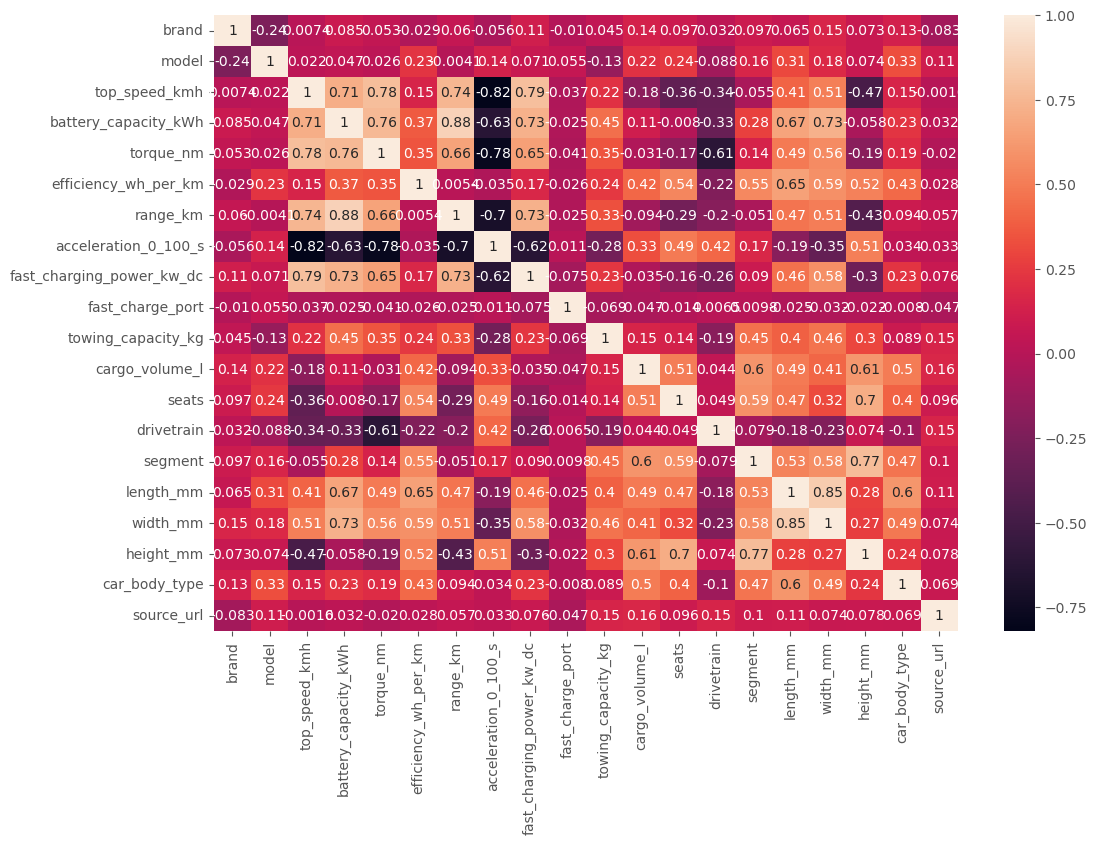

In [27]:
correlation_matrix = E_Vehicles_Numerized.corr(method = 'pearson', numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Although this correlation table is very cluttered we can get some information such as top speed and battery capacity seeming to be highly positively correlated, however number of cells and battery capacity has a weak correlation with each other. We can extract all relationships that have a strong correlation i.e strong negative of over -.5 and strong positive of over .5.

In this case seeing p-values for efficiency, and range may be useful to see useful variables for creating a regression model.

In [43]:
data = []

for col in E_Vehicles_Numerized:
    n ,p = scipy.stats.pearsonr(E_Vehicles_Numerized.efficiency_wh_per_km, E_Vehicles_Numerized[col])
    if col == 'efficiency_wh_per_km':
        print('This is original column')
    
    elif p <.1:
        print(col, 'is statistically significant p=', p, 'has a correlation of', n)
        significance = 'yes'
        data.append([n, p, 'efficiency_wh_per_km', col, significance])
    else:
        print(col, 'is NOT statistically signficiant p=', p, 'has a correlation of', n)
        significance = 'no'
        data.append([n, p, 'efficiency_wh_per_km', col, significance])
    print()


    
for col in E_Vehicles_Numerized:
    n ,p = scipy.stats.pearsonr(E_Vehicles_Numerized.range_km, E_Vehicles_Numerized[col])
    if col == 'range_km':
        print('This is original column')

    elif p <.1:
        print(col, 'is statistically significant p=', p, 'has a correlation of', n)
        significance = 'yes'
        data.append([n, p, 'range_km', col, significance])
    else:
        print(col, 'is NOT statistically signficiant p=', p, 'has a correlation of', n)
        significance = 'no'
        data.append([n, p, 'range_km', col, significance])

    print()

E_Vehicles_Eff_Range_Corr_P = pd.DataFrame(data, columns = ['correlation', 'p-value', 'value1', 'value2', 'signicant'])

brand is NOT statistically signficiant p= 0.5472680031734638 has a correlation of -0.028702893294074796

model is statistically significant p= 1.264837177289935e-06 has a correlation of 0.22806438200700452

top_speed_kmh is statistically significant p= 0.0016563619645763872 has a correlation of 0.14921422617565533

battery_capacity_kWh is statistically significant p= 1.2823500910919344e-15 has a correlation of 0.367960582433566

torque_nm is statistically significant p= 4.2696973447006744e-14 has a correlation of 0.34887517792469114

This is original column

range_km is NOT statistically signficiant p= 0.9094990808214377 has a correlation of 0.005422063516373161

acceleration_0_100_s is NOT statistically signficiant p= 0.46464111101156175 has a correlation of -0.03486903705201934

fast_charging_power_kw_dc is statistically significant p= 0.0004747180008013237 has a correlation of 0.16554314047290664

fast_charge_port is NOT statistically signficiant p= 0.5914065412120719 has a correlat

In [44]:
Significant_Pairs =E_Vehicles_Eff_Range_Corr_P.loc[E_Vehicles_Eff_Range_Corr_P['signicant'] == 'yes'].copy()

In [47]:
Significant_Pairs.sort_values('correlation', ascending = False)

,correlation,p-value,value1,value2,signicant
22,0.877989,7.188540e-143,range_km,battery_capacity_kWh,yes
21,0.744226,3.877880e-79,range_km,top_speed_kmh,yes
26,0.725452,2.153801e-73,range_km,fast_charging_power_kw_dc,yes
23,0.662811,2.984642e-57,range_km,torque_nm,yes
14,0.654865,1.769868e-55,efficiency_wh_per_km,length_mm,yes
15,0.585201,5.670013e-42,efficiency_wh_per_km,width_mm,yes
13,0.546347,9.268232e-36,efficiency_wh_per_km,segment,yes
11,0.543184,2.739290e-35,efficiency_wh_per_km,seats,yes
16,0.522337,2.621395e-32,efficiency_wh_per_km,height_mm,yes
34,0.506245,3.822853e-30,range_km,width_mm,yes


Looking into the significant pairing for both efficiency and range it seems that dispite sharing significance with a lot of common columns it seems range and efficiency are not significant with each other.

Looking further into the findings it seems that for range, cars with high performance (speed, acceleration, etc.) seem to increase the range. Which could make sense as things such as weight reduction could be used to increase speed but also increase range, then the biggest show of potential range it the capacity of the cars battery, although it is important to note the cars included in the dataset seem to not be on the big side such as pickups trucks like the Ford Lightning or the Tesla semi-truck. Looking at efficiency it seems the cars physical makeup such as size seem to have the greatest connect to how efficent a car it is.